# Optimization results for the Power series, Fourier series and Gaussian superposition pulses

In [1]:
# !pip install uncertainties
# !pip install quantum_gates

In [2]:
# !pip install pandas>= 1.4.0

## Imports

In [3]:
import numpy as np
import pandas as pd
import json 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import ast

In [4]:
def set_matplotlib_style(overwrite: dict={}):
    """Sets the rc parameters to pre-defined values.

    Use the overwrite lookup to overwrite the default behaviour.

    Args:
        overwrite (dict): Lookup table which can be used to overwrite the default values.
    """
    plt.rcParams.update({
        "axes.titlesize": 16,
        "axes.labelsize": 12,
        "lines.linewidth": 1.5,
        "lines.markersize": 5,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": "medium",
        "figure.figsize": (8, 6),
    })

    # Plot background -> white inside, transparent outside
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
        "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
        "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
    })

    # Plot error bars
    plt.rcParams.update({
        "errorbar.capsize":  8,  # Length of the error bar caps
    })

    # Overwrite default behaviour
    if isinstance(overwrite, dict) and len(overwrite) > 0:
        plt.rcParams.update(overwrite)
    return


def activate_latex(preamble_list: list[str]=[]):
    """Activates LaTeX for use in Matplotlib and import some packages.

    Imported packages include amsmath, amssymb, and braket.

    Examples:
        preamble_list = ['\\usepackage{myfancypackage}'] where the string has an r as prefix.

    Args:
        preample_list (list[str]): List of raw str that represent the lines of the LaTeX preample used for imports.
    """

    pgf_with_latex = {
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"],
        "text.latex.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage{amsmath}",
            r"\usepackage{amssymb}",
            r"\usepackage{braket}",
        ] + preamble_list)
    }
    mpl.rcParams.update(pgf_with_latex)
    return

In [5]:
set_matplotlib_style()

## Paths

In [6]:
rel_folder = "../../results/integrals"
plot_folder = "../../plots/integrals"

In [7]:
import os

def create_folder(path):
    folders = path.split('/')
    current_path = ''
    for folder in folders:
        current_path += folder + '/'
        if not os.path.exists(current_path):
            os.makedirs(current_path)

## Settings

In [8]:
# theta = 0.785398
# theta_str = "pi quarter"
# theta = 1.570796
# theta_str = "pi half"
# theta = 2.356194
# theta_str = "pi three quarter"
theta = 3.141592
theta_str = "pi"

## Data loading 

In [9]:
runs = [
        'power_constrained',
        'fourier_constrained',
        'gaussian_constrained'
]
pd_lookup = {
    run: pd.read_csv(f"{rel_folder}/{run}/results.csv") for run in runs
}
pd_lookup

{'power_constrained':            config.name                                 config.description  \
 0    power_constrained  Configuration to test the Power Pulses with co...   
 1    power_constrained  Configuration to test the Power Pulses with co...   
 2    power_constrained  Configuration to test the Power Pulses with co...   
 3    power_constrained  Configuration to test the Power Pulses with co...   
 4    power_constrained  Configuration to test the Power Pulses with co...   
 ..                 ...                                                ...   
 235  power_constrained  Configuration to test the Power Pulses with co...   
 236  power_constrained  Configuration to test the Power Pulses with co...   
 237  power_constrained  Configuration to test the Power Pulses with co...   
 238  power_constrained  Configuration to test the Power Pulses with co...   
 239  power_constrained  Configuration to test the Power Pulses with co...   
 
     config.content.factory     config.co

In [10]:
# Query dfs to only contain rows for certain theta value
pd_lookup = {
    run: df.loc[abs(df['args.theta'] - theta) <= 1e-1] for run, df in pd_lookup.items()
}

In [12]:
pd_lookup["power_constrained"].head()

,config.name,config.description,config.content.factory,config.content.factory_path,config.content.factory_args,config.content.ansatz_name,config.content.loss,config.content.loss_path,config.content.variable_args.shift,config.content.variable_args.n,...,results.x,results.optimality,results.constr_violation,results.execution_time,results.tr_radius,results.constr_penalty,results.status,results.niter,results.success,results.message
15,power_constrained,Configuration to test the Power Pulses with co...,PowerFactory,pulse_opt.pulses.power_factory,"['shift', 'n', 'has_vanishing_endpoints']",Power series,PowerLoss,pulse_opt.integrals.losses,"[0.0, 0.5, 1.0]","[4, 8, 16, 32]",...,[ 2.18808589e-19 2.88749628e-01 6.98153515e+...,0.014606,1.261835e-11,29.682988,1.000000,1.0,0,1000,False,The maximum number of function evaluations is ...
16,power_constrained,Configuration to test the Power Pulses with co...,PowerFactory,pulse_opt.pulses.power_factory,"['shift', 'n', 'has_vanishing_endpoints']",Power series,PowerLoss,pulse_opt.integrals.losses,"[0.0, 0.5, 1.0]","[4, 8, 16, 32]",...,[ 3.03950937e-20 2.34450619e-01 7.10861170e+...,0.015938,2.716716e-12,12.443412,1.000000,1.0,0,1000,False,The maximum number of function evaluations is ...
17,power_constrained,Configuration to test the Power Pulses with co...,PowerFactory,pulse_opt.pulses.power_factory,"['shift', 'n', 'has_vanishing_endpoints']",Power series,PowerLoss,pulse_opt.integrals.losses,"[0.0, 0.5, 1.0]","[4, 8, 16, 32]",...,[ 5.40176592e-15 2.61731798e+00 -5.93157146e+...,0.000097,2.258367e-06,0.141713,1369.211707,1.0,1,10,True,`gtol` termination condition is satisfied.
18,power_constrained,Configuration to test the Power Pulses with co...,PowerFactory,pulse_opt.pulses.power_factory,"['shift', 'n', 'has_vanishing_endpoints']",Power series,PowerLoss,pulse_opt.integrals.losses,"[0.0, 0.5, 1.0]","[4, 8, 16, 32]",...,[ 1.28904706e-20 4.45804222e+00 -1.42118731e+...,0.004701,2.962003e-11,9.109564,1.000000,1.0,0,1000,False,The maximum number of function evaluations is ...
19,power_constrained,Configuration to test the Power Pulses with co...,PowerFactory,pulse_opt.pulses.power_factory,"['shift', 'n', 'has_vanishing_endpoints']",Power series,PowerLoss,pulse_opt.integrals.losses,"[0.0, 0.5, 1.0]","[4, 8, 16, 32]",...,[ 9.07315659e-20 1.82916078e+00 3.86341205e+...,0.007679,4.121326e-11,14.970035,1.000000,1.0,0,1000,False,The maximum number of function evaluations is ...


In [15]:
pd_lookup["fourier_constrained"].head()

,config.name,config.description,config.content.factory,config.content.factory_path,config.content.factory_args,config.content.ansatz_name,config.content.loss,config.content.loss_path,config.content.variable_args.shift,config.content.variable_args.n,...,results.x,results.optimality,results.constr_violation,results.execution_time,results.tr_radius,results.constr_penalty,results.status,results.niter,results.success,results.message
15,fourier_constrained,Configuration to test the Fourier Pulses with ...,FourierFactory,pulse_opt.pulses.fourier_factory,"['shift', 'n', 'has_vanishing_endpoints']",Fourier series,FourierLoss,pulse_opt.integrals.losses,"[0.0, 0.25, 0.5, 0.75, 1.0]","[2, 4, 8, 16]",...,[ 264.53795569 -283.87137885 -174.3943312 1...,0.000050,8.919443e-10,9.575171,1397.052079,1.0,1,73,True,`gtol` termination condition is satisfied.
16,fourier_constrained,Configuration to test the Fourier Pulses with ...,FourierFactory,pulse_opt.pulses.fourier_factory,"['shift', 'n', 'has_vanishing_endpoints']",Fourier series,FourierLoss,pulse_opt.integrals.losses,"[0.0, 0.25, 0.5, 0.75, 1.0]","[2, 4, 8, 16]",...,[ 263.10903987 -282.79465977 -173.6344098 1...,0.000015,1.338663e-11,4.648795,381.917596,1.0,1,77,True,`gtol` termination condition is satisfied.
17,fourier_constrained,Configuration to test the Fourier Pulses with ...,FourierFactory,pulse_opt.pulses.fourier_factory,"['shift', 'n', 'has_vanishing_endpoints']",Fourier series,FourierLoss,pulse_opt.integrals.losses,"[0.0, 0.25, 0.5, 0.75, 1.0]","[2, 4, 8, 16]",...,[ 157.71331734 -185.38915752 -109.19163745 1...,0.000064,2.358291e-11,2.218284,1013.430931,1.0,1,32,True,`gtol` termination condition is satisfied.
18,fourier_constrained,Configuration to test the Fourier Pulses with ...,FourierFactory,pulse_opt.pulses.fourier_factory,"['shift', 'n', 'has_vanishing_endpoints']",Fourier series,FourierLoss,pulse_opt.integrals.losses,"[0.0, 0.25, 0.5, 0.75, 1.0]","[2, 4, 8, 16]",...,[-208.43307918 187.97153627 126.03449375 1...,0.000055,9.706014e-12,4.145321,1285.795941,1.0,1,63,True,`gtol` termination condition is satisfied.
19,fourier_constrained,Configuration to test the Fourier Pulses with ...,FourierFactory,pulse_opt.pulses.fourier_factory,"['shift', 'n', 'has_vanishing_endpoints']",Fourier series,FourierLoss,pulse_opt.integrals.losses,"[0.0, 0.25, 0.5, 0.75, 1.0]","[2, 4, 8, 16]",...,[ 2.97813083e+01 2.97813492e+01 -1.32760304e-...,0.000055,1.328907e-09,1.805887,92.723048,1.0,1,22,True,`gtol` termination condition is satisfied.


In [16]:
pd_lookup["gaussian_constrained"].head()

,config.name,config.description,config.content.factory,config.content.factory_path,config.content.factory_args,config.content.ansatz_name,config.content.loss,config.content.loss_path,config.content.variable_args.scale,config.content.variable_args.n,...,results.x,results.optimality,results.constr_violation,results.execution_time,results.tr_radius,results.constr_penalty,results.status,results.niter,results.success,results.message
15,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianFactory,pulse_opt.pulses.gaussian_factory,"['scale', 'n', 'has_vanishing_endpoints']",Gaussian superposition,GaussianLoss,pulse_opt.integrals.losses,"[0.1, 0.2, 0.3, 0.4, 0.5]","[4, 8, 16, 32]",...,[ 0.0024463 -0.632787 1.63515462 -0.00632138],1.019561e-06,2.677192e-12,181.643745,1.810330,1.0,1,21,True,`gtol` termination condition is satisfied.
16,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianFactory,pulse_opt.pulses.gaussian_factory,"['scale', 'n', 'has_vanishing_endpoints']",Gaussian superposition,GaussianLoss,pulse_opt.integrals.losses,"[0.1, 0.2, 0.3, 0.4, 0.5]","[4, 8, 16, 32]",...,[ 0.00236516 -0.61179872 1.61416633 -0.00624024],4.978148e-05,1.931200e-11,86.867263,0.554762,1.0,1,20,True,`gtol` termination condition is satisfied.
17,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianFactory,pulse_opt.pulses.gaussian_factory,"['scale', 'n', 'has_vanishing_endpoints']",Gaussian superposition,GaussianLoss,pulse_opt.integrals.losses,"[0.1, 0.2, 0.3, 0.4, 0.5]","[4, 8, 16, 32]",...,[ 0.00135726 -0.3510846 1.35345221 -0.00523234],2.971739e-05,1.374478e-11,45.164257,1.039564,1.0,1,15,True,`gtol` termination condition is satisfied.
18,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianFactory,pulse_opt.pulses.gaussian_factory,"['scale', 'n', 'has_vanishing_endpoints']",Gaussian superposition,GaussianLoss,pulse_opt.integrals.losses,"[0.1, 0.2, 0.3, 0.4, 0.5]","[4, 8, 16, 32]",...,[-5.11714683e-03 1.32365562e+00 -3.21288002e-...,9.004341e-07,1.412870e-12,63.251485,0.457258,1.0,1,21,True,`gtol` termination condition is satisfied.
19,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianFactory,pulse_opt.pulses.gaussian_factory,"['scale', 'n', 'has_vanishing_endpoints']",Gaussian superposition,GaussianLoss,pulse_opt.integrals.losses,"[0.1, 0.2, 0.3, 0.4, 0.5]","[4, 8, 16, 32]",...,[-0.00193754 0.50118381 0.50118381 -0.00193754],1.501378e-08,5.993470e-16,0.000653,1.000000,1.0,1,1,True,`gtol` termination condition is satisfied.


## Visualize final loss for different number of basis functions



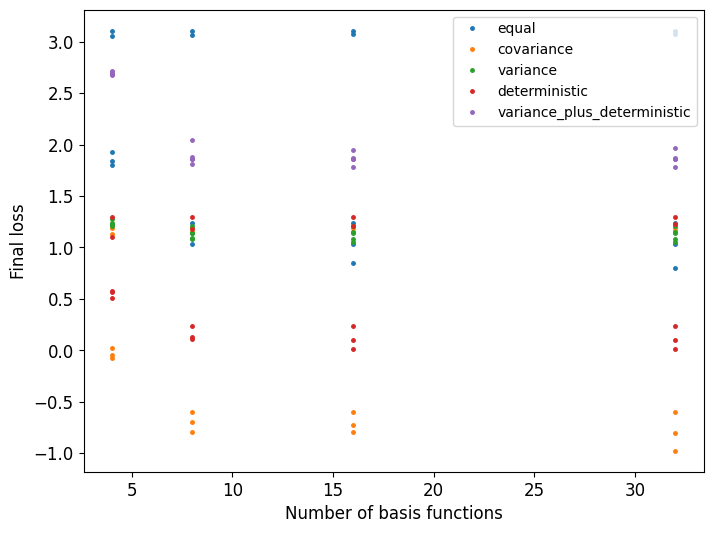

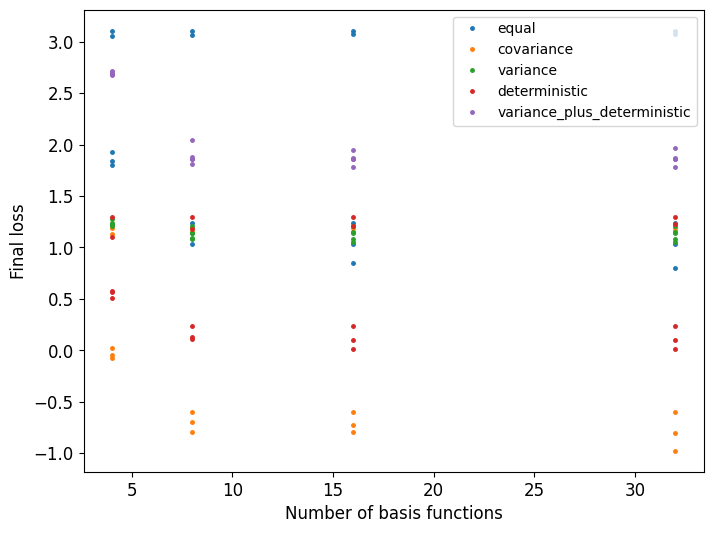

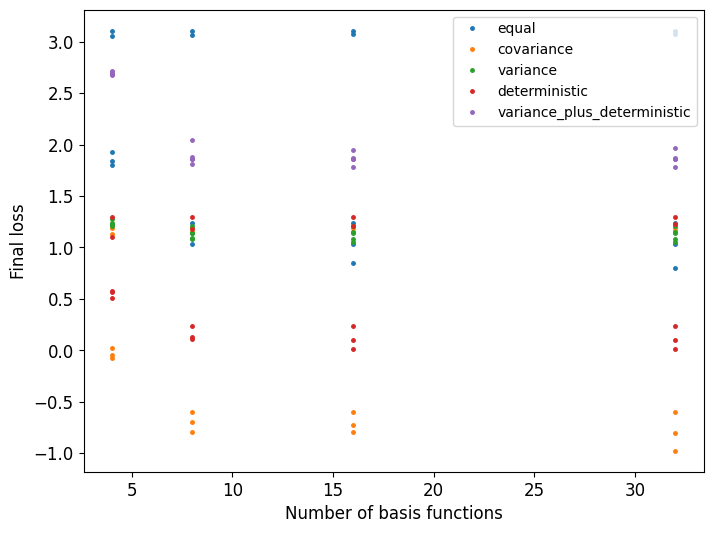

In [30]:
for ansatz, df0 in pd_lookup.items():
    plt.figure()

    theta0 = df["args.theta"].unique()[0]
    df = df[df["args.theta"] == theta0]

    for weights in df['args.weights'].unique():

        x = df[df['args.weights'] == weights]['args.n']
        # Todo: Transform x to n depending on the ansatz
        y = df[df['args.weights'] == weights]['results.fun']
        plt.plot(x, y, ".", label=weights)
    plt.xlabel("Number of basis functions")
    plt.ylabel("Final loss")
    plt.legend()
    plt.show()